# Logistic Regression

## Get preprocessed data

In [1]:
import boto3
from boto3 import session
import os

key_id = os.environ.get("AWS_ACCESS_KEY_ID")
secret_key = os.environ.get("AWS_SECRET_ACCESS_KEY")
bucket_name = os.environ.get("AWS_S3_BUCKET")
s3_endpoint = os.environ.get("AWS_S3_ENDPOINT")

s3_client = boto3.client("s3", aws_access_key_id=key_id, aws_secret_access_key=secret_key, endpoint_url=s3_endpoint)

In [2]:
s3_client.download_file(bucket_name, "preprocessed.csv", 'preprocessed.csv')

In [3]:
import pandas as pd

df=pd.read_csv("preprocessed.csv", encoding="latin_1")

## Train model

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer



In [5]:
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["target"],
                                                    test_size = 0.05, random_state = 0)

In [6]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,2), max_features=500000)), ('model', LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1))])
pipe.fit(X_train, y_train).score(X_test, y_test)

0.7953100058276534

In [8]:
from pickle import dump
with open("lr-pipeline.pkl", "wb") as f:
    dump(pipe, f, protocol=5)


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)



              precision    recall  f1-score   support

           0       0.80      0.78      0.79     39244
           1       0.79      0.81      0.80     39690

    accuracy                           0.80     78934
   macro avg       0.80      0.80      0.80     78934
weighted avg       0.80      0.80      0.80     78934



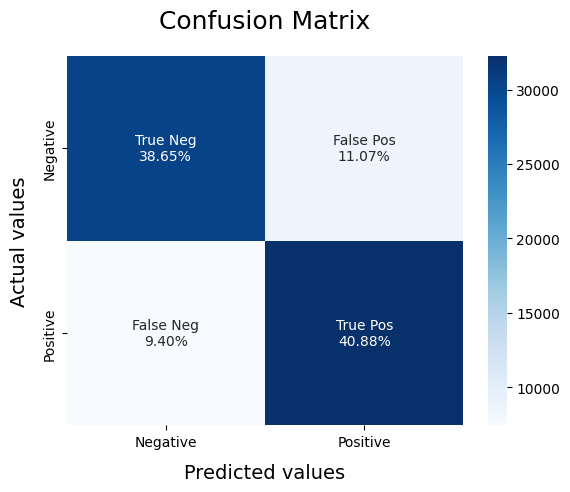

In [14]:
model_Evaluate(pipe)